In [4]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from credentials import *    # This will allow us to use the keys as variables

# Twitter App access keys for @user
CONSUMER_KEY = "1IUgsrLk3Dpjsoy1Zjsh6TScu"
CONSUMER_SECRET = "NtK32AtGZEmDaxJS1pzLb84qSLejKO9CfFMWsZRV6ePwveCoTE"
ACCESS_TOKEN = "1046893198193364992-cYS6QDx5FmB8TrLA9Ol89rOzurumwJ"
ACCESS_SECRET = "G5Xk5lCSw85fBouRCwedabONOtKs9PzEkIyU9Adgq4gXh"
    

def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth, wait_on_rate_limit=True)
    return api
    
api=twitter_setup()
extractor = twitter_setup()
startDate = datetime.datetime(2015, 1, 1, 0, 0, 0)
endDate =   datetime.datetime(2016, 11, 11, 0, 0, 0)

search1 = tweepy.Cursor(api.search, q='#nida,#nahdha').items(50) 

In [5]:
# General:
import csv
print("5 recent tweets:\n")
iden = []
text = []
tweetname=[]
tmp=[]
idtweet=[]
NomTweeteur=[]
retweetName=[]
idNomTweeteur=[]
idretweeteur=[]

for tweet in search1:
    print("cc bon ")
    #print(tweet.user.id)
    iden.append(tweet.id)
    tmp.append(tweet.created_at)
    tweetname.append(tweet.user.screen_name)
    text.append(tweet.text)
    
    for reTweet in api.retweets(tweet.id):
        print("cbon 2")
        #print(reTweet.author.id)
        idtweet.append(tweet.id)
        idNomTweeteur.append(tweet.user.id)
        NomTweeteur.append(tweet.user.screen_name)
        idretweeteur.append(reTweet.author.id)
        retweetName.append(reTweet.author.name)           
    
df = pd.DataFrame()
df['iden'] = iden
df['tweetname'] = tweetname
#
df['text'] = text  
df['tmp']=tmp
#df.to_csv('test32.csv',index = False,encoding='utf-8')

df2=pd.DataFrame()
df2['idtweet'] =idtweet 
df2['idNomTweeteur']=idNomTweeteur
df2['NomTweeteur']=NomTweeteur  
df2['idretweeteur'] = idretweeteur  
df2['retweetName']=retweetName
#df2.to_csv('politicshow.csv',index = False,encoding='utf-8')





5 recent tweets:



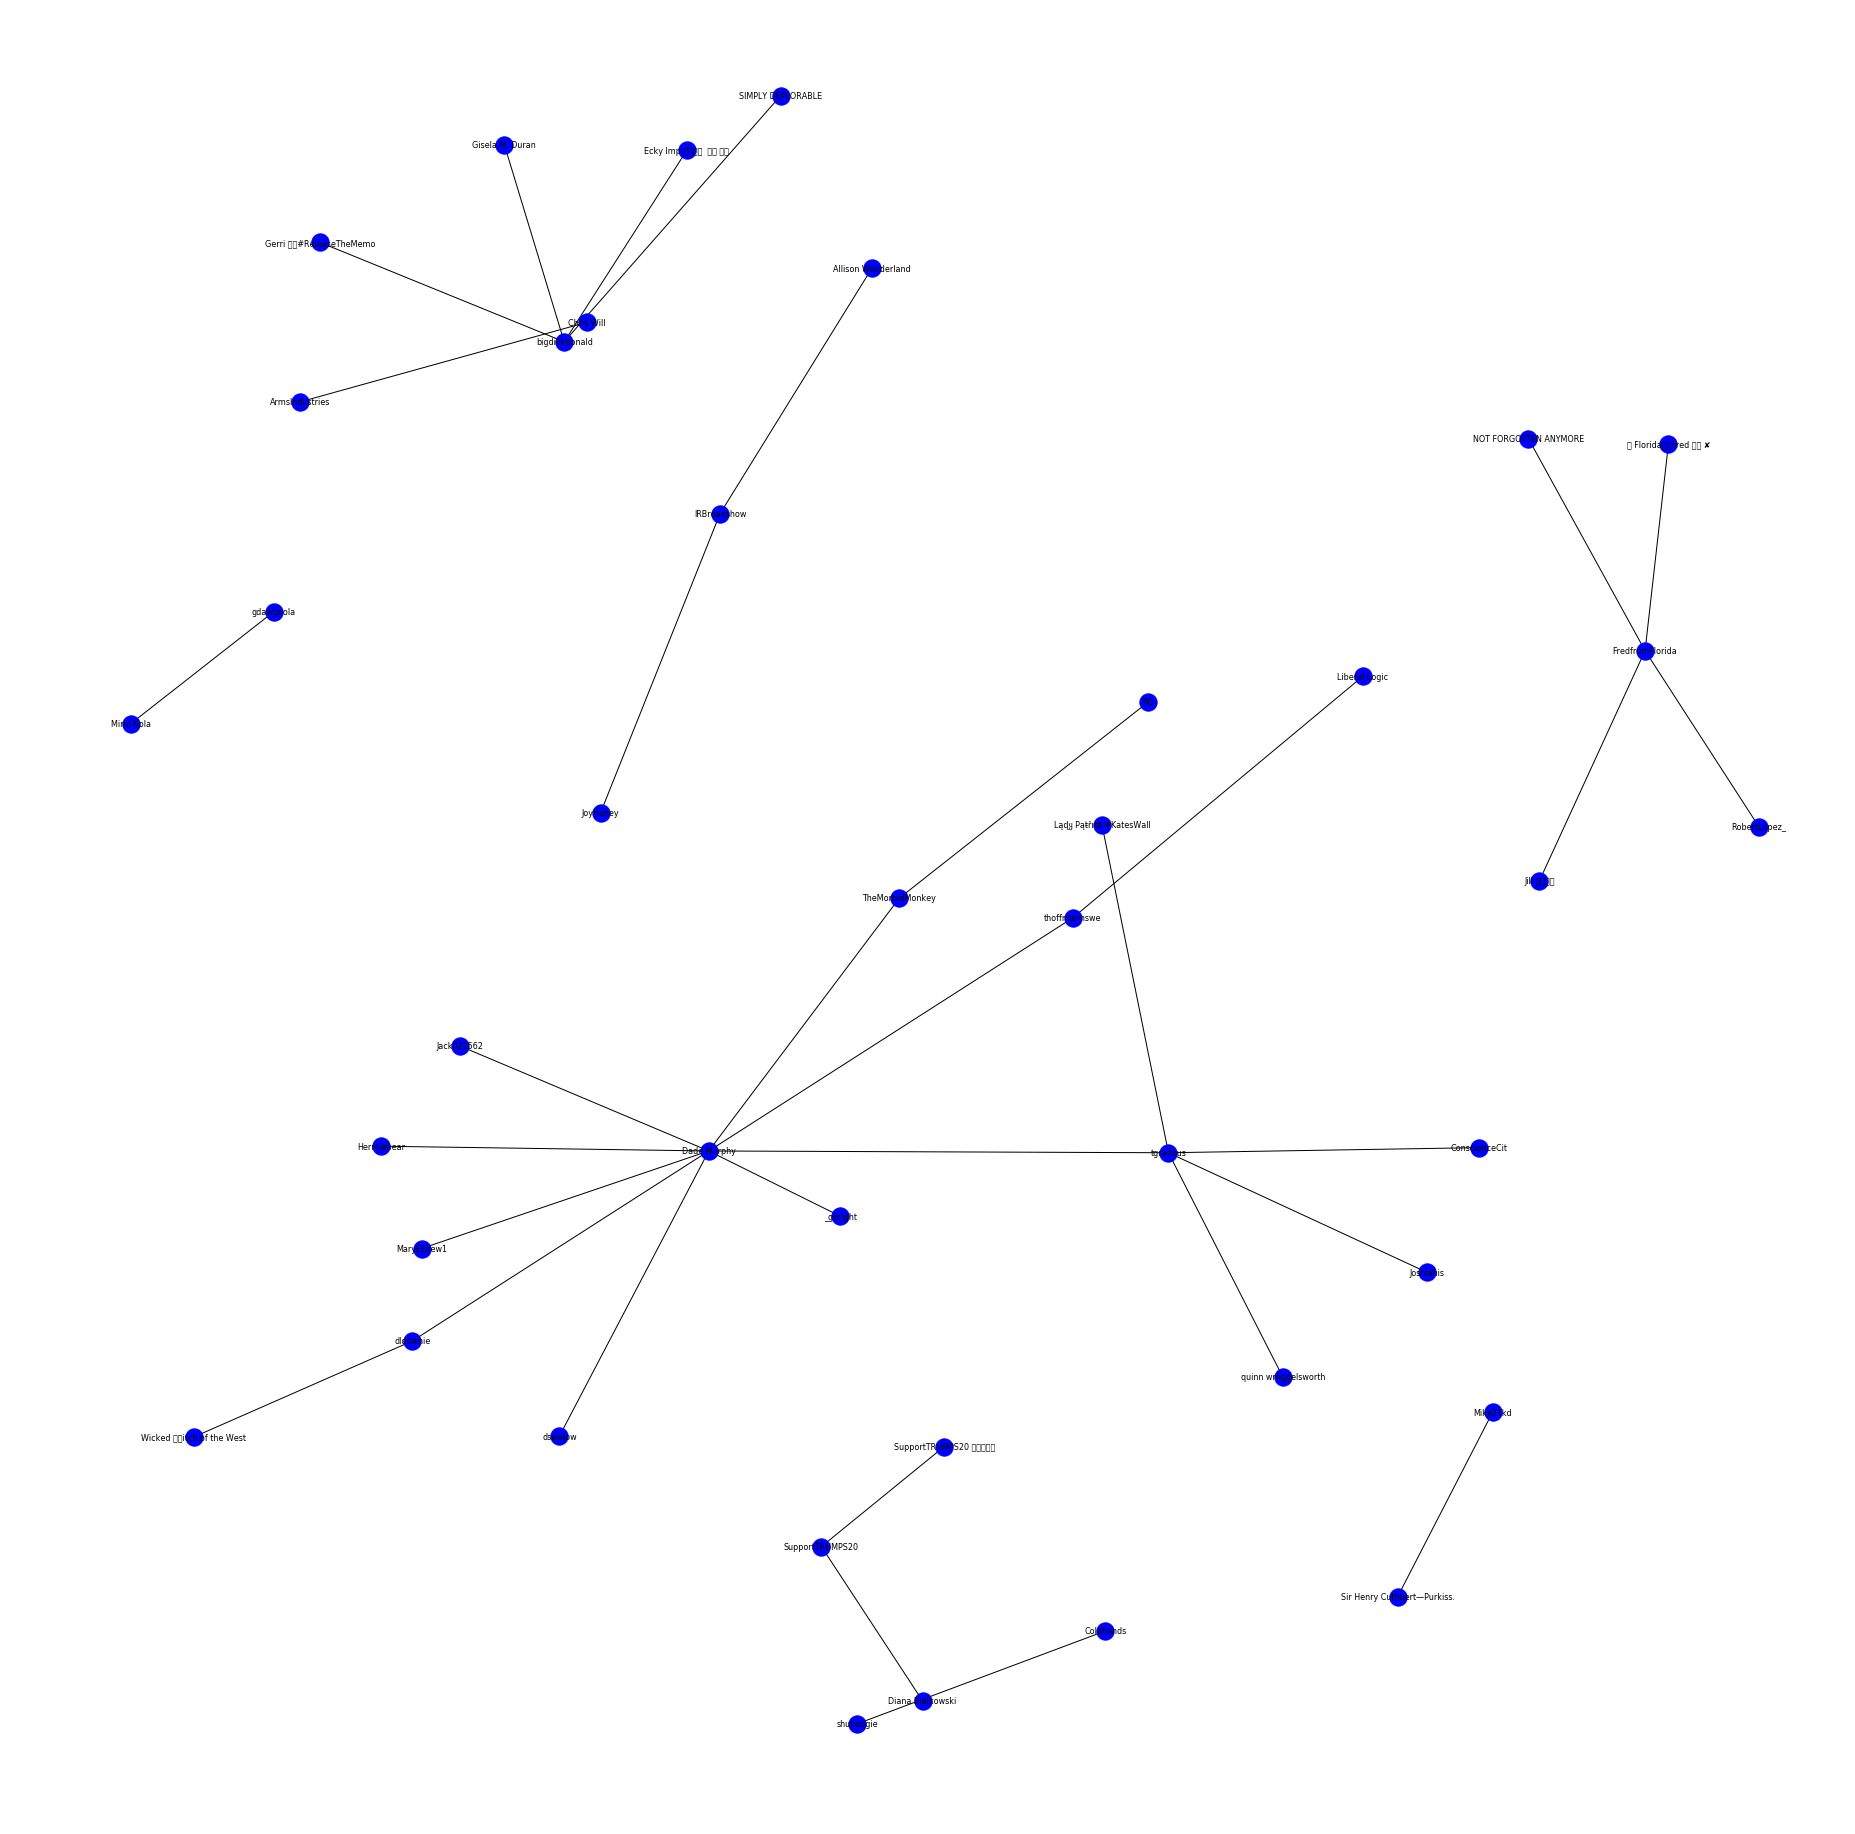

In [21]:
import plotly.plotly as py
from plotly.graph_objs import *
import networkx as nx
df = pd.read_csv('test31.csv')

df.describe()

df.idNomTweeteur=df.idNomTweeteur.apply(lambda x: int(x))
df.idretweeteur=df.idretweeteur.apply(lambda x: int(x))
# un digraphe
G = nx.DiGraph()
G = nx.Graph()

G.add_nodes_from(df['NomTweeteur'])
temp = zip(df['NomTweeteur'],df['retweetName'])
G.add_edges_from(temp)

plt.figure(4,figsize=(25,25)) 
nx.draw(G,pos=nx.spring_layout(G,k=.50),font_size=8,with_labels=True,node_color = "blue")
plt.show()
pos=nx.spring_layout(G,k=.50)


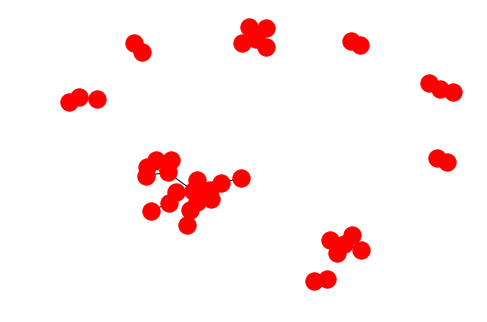

In [22]:
nx.draw(G)
nx.write_gexf(G,"GraphTwitterRepublican.gexf")

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from textblob import TextBlob
import re
import csv

In [9]:
def clean_text(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

In [14]:
df = pd.read_csv('test26.csv')


In [11]:
descriptions = np.array(list(map(clean_text,df.text)))
#descriptions

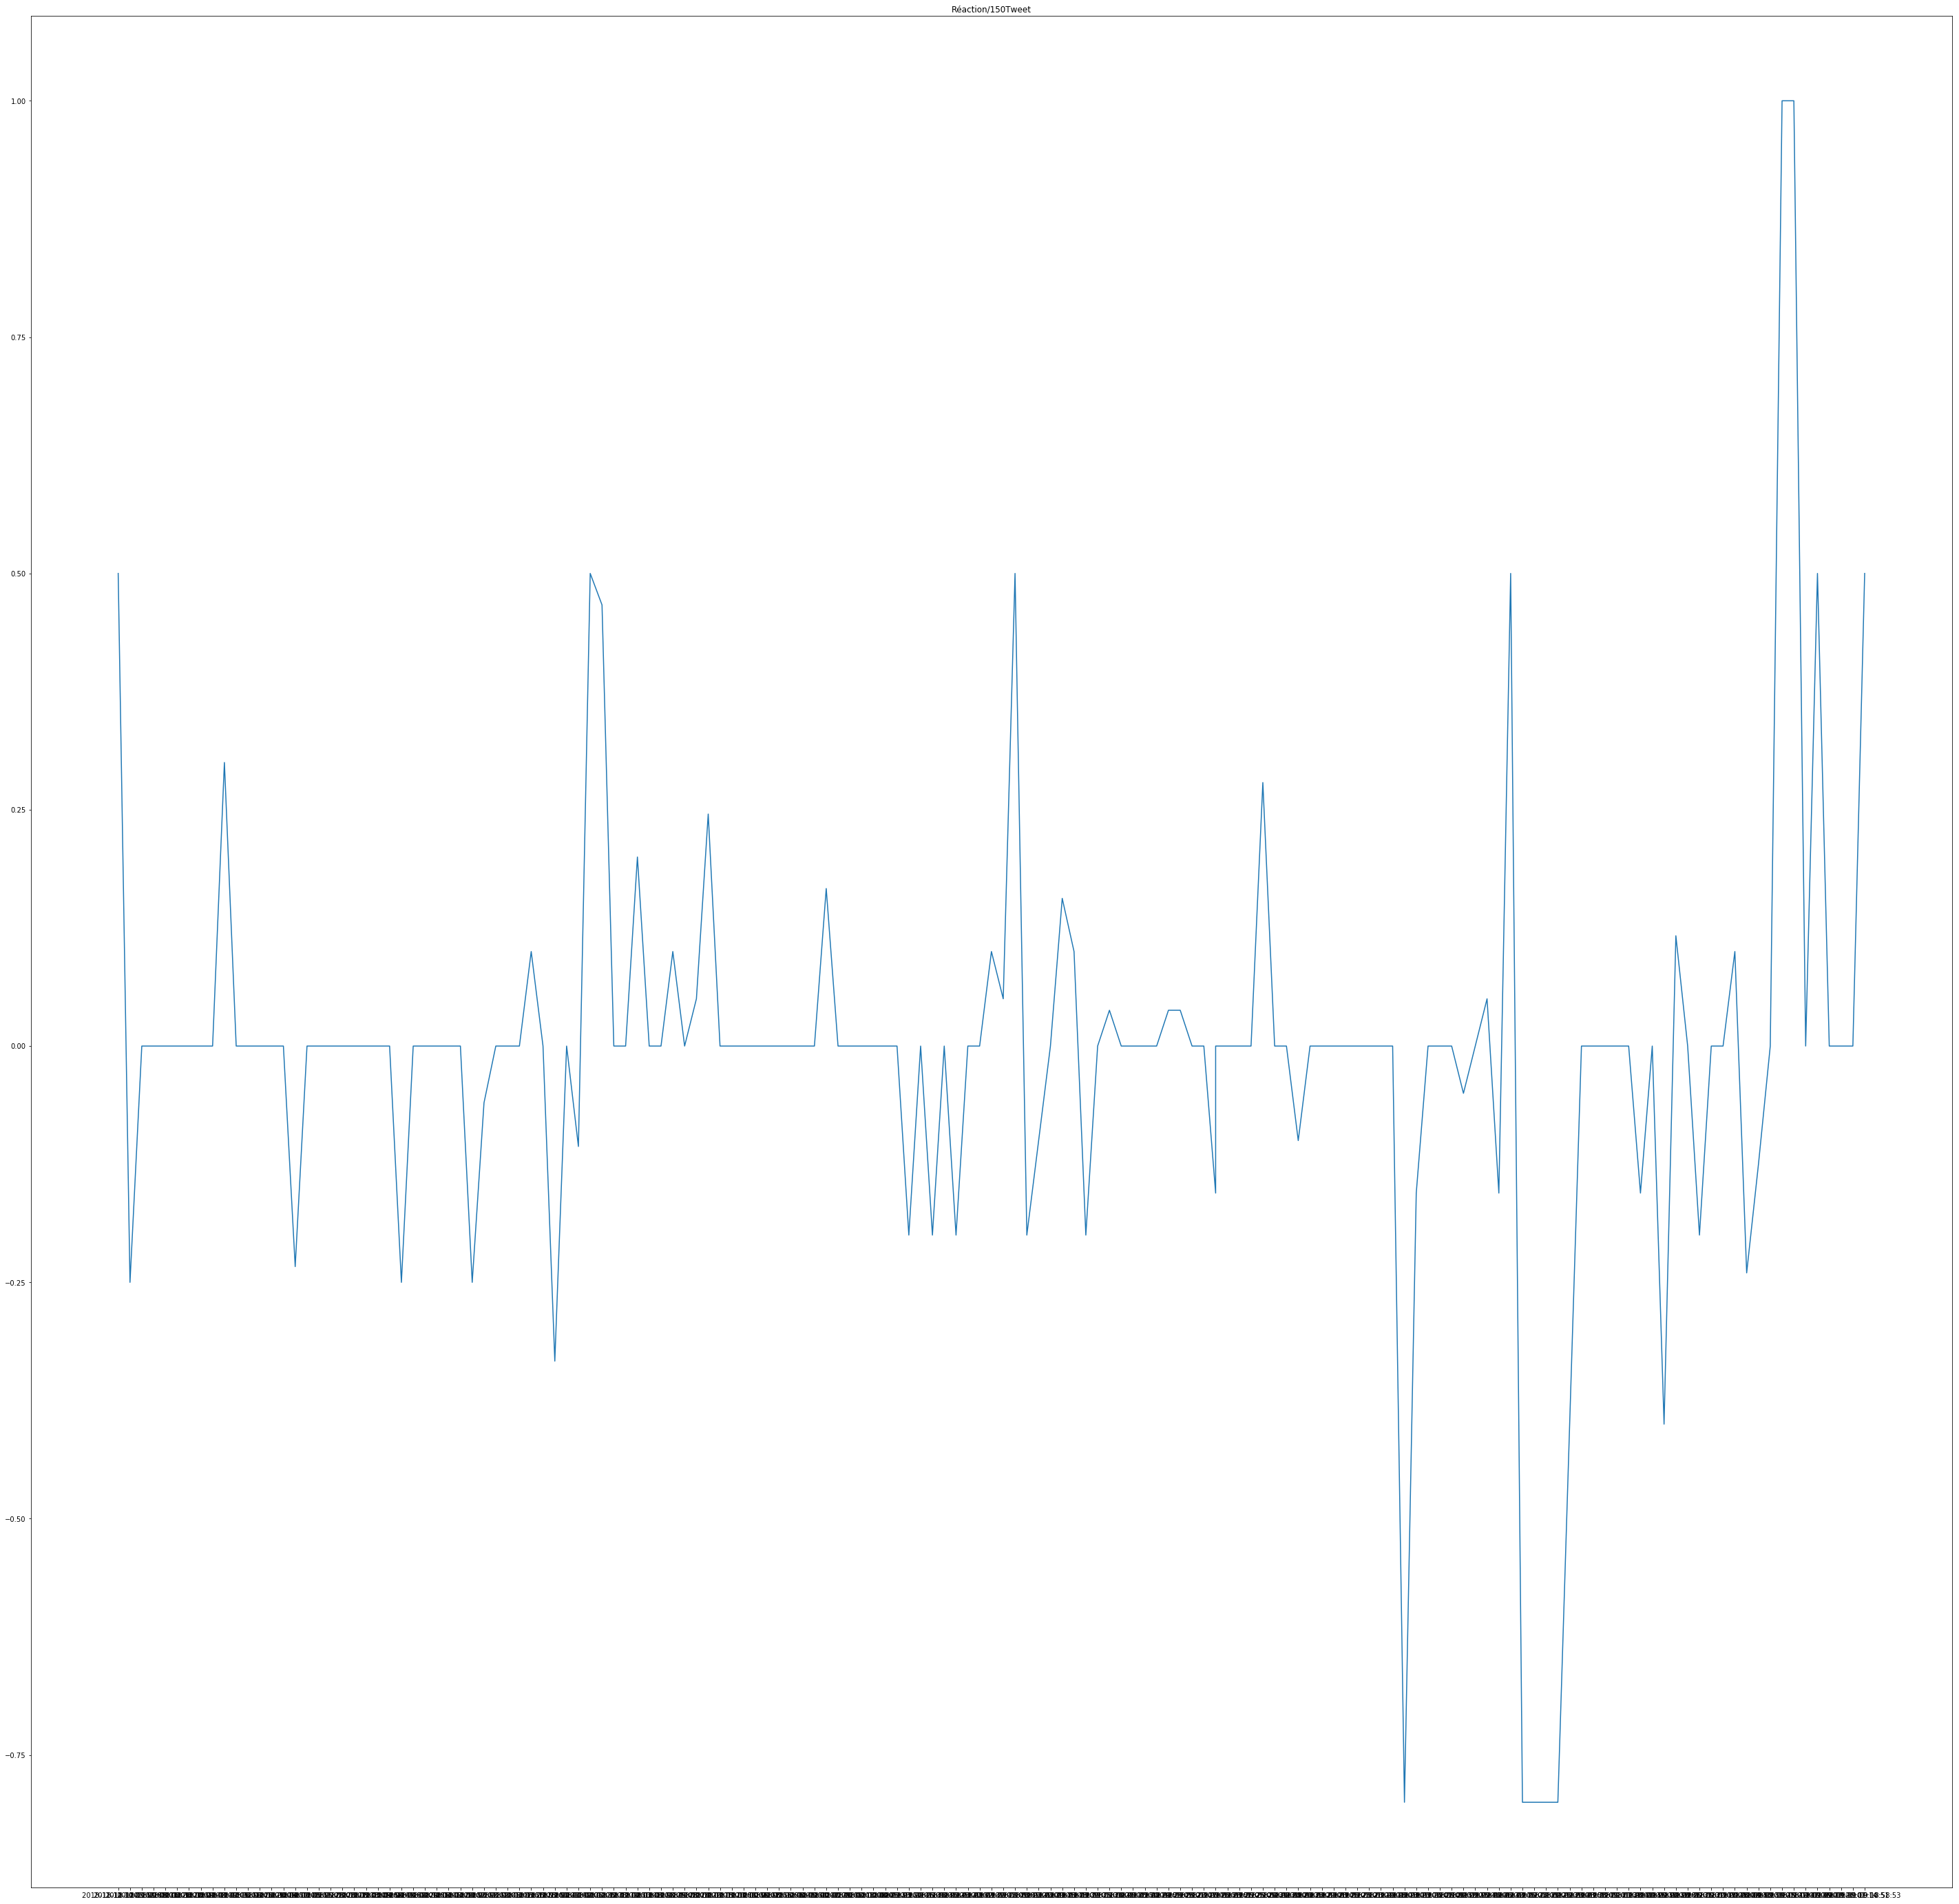

In [22]:

txt=[]
for message in descriptions :
    analysis = TextBlob(message) 
    txt.append(analysis.sentiment.polarity)
plt.figure(4,figsize=(50,50)) 
plt.plot(df.tmp,np.array(txt))  # arguments are passed to np.histogram

plt.title("Réaction/150Tweet")
plt.show()



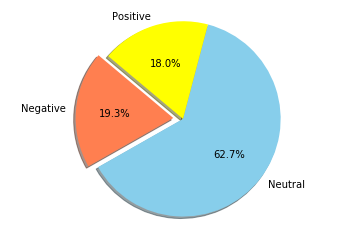

In [30]:
 # Data to plot
sizes = {
    'Negative':0, 'Neutral':0, 'Positive':0
}
for i in txt :
    if i > 0:
        sizes['Positive'] +=1
    elif i < 0:
        sizes['Negative'] +=1
    else:
        sizes['Neutral'] +=1


colors = ['coral','skyblue', 'yellow']
explode = (0.1, 0, 0) 
plt.pie(sizes.values(), labels=sizes.keys(), colors=colors,explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [2]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from credentials import *    # This will allow us to use the keys as variables

# Twitter App access keys for @user
CONSUMER_KEY = "3Ex5x7oCkUBni5FxBcfjhxatO"
CONSUMER_SECRET = "jujjuCVdKWcbbfN6dLScSaLDCvyRgdICpjV2DhYdy2rQJDJKpf"
ACCESS_TOKEN = "382673092-VUr93O7OApbC9z3zjjWGRIIpzflND7C5yrXxdBgu"
ACCESS_SECRET = "hnUY8sW38L0zHtiF5PXaepx8nU0H5W8s7nfjwNTAItLCh"
    

def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth, wait_on_rate_limit=True)
    return api
    
api=twitter_setup()
extractor = twitter_setup()
startDate = datetime.datetime(2017, 1, 1, 0, 0, 0)
endDate =   datetime.datetime(2018, 11, 11, 0, 0, 0)

import csv


#csvFile = open(r'C:\Users\Sarra Boukercha\Desktop\4Ds\python\projet2\test3.csv', 'a', encoding='utf8', newline='')
#csvWriter = csv.writer(csvFile)


search2 = tweepy.Cursor(api.search, q='#democratic').items(200) 

In [33]:

# We print the most recent 5 tweets:
print("5 recent tweets:\n")

iden = []
text = []
tweetname=[]

tmp=[]


idtweet=[]
NomTweeteur=[]
retweetName=[]
idNomTweeteur=[]
idretweeteur=[]

for tweet in search:
    print("cc bon ")
    #print(tweet.user.id)
    iden.append(tweet.id)
    tmp.append(tweet.created_at)
    tweetname.append(tweet.user.screen_name)
    text.append(tweet.text)
    for reTweet in api.retweets(tweet.id):
        print("cbon 2")
        #print(reTweet.author.id)
        idtweet.append(tweet.id)
        idNomTweeteur.append(tweet.user.id)
        NomTweeteur.append(tweet.user.screen_name)
        idretweeteur.append(reTweet.author.id)
        retweetName.append(reTweet.author.name)
        
       
   
    
    

print("ok")    
    
df = pd.DataFrame()
df['iden'] = iden
df['tweetname'] = tweetname
#
df['text'] = text  
df['tmp']=tmp
df.to_csv('test28.csv',index = False,encoding='utf-8')

df2=pd.DataFrame()
df2['idtweet'] =idtweet 
df2['idNomTweeteur']=idNomTweeteur
df2['NomTweeteur']=NomTweeteur  
df2['idretweeteur'] = idretweeteur  
df2['retweetName']=retweetName
df2.to_csv('test29.csv',index = False,encoding='utf-8')


5 recent tweets:

cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cbon 2
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cbon 2
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cbon 2
cc bon 
cc bon 
cc bon 
cc bon 
cbon 2
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cbon 2
cbon 2
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cbon 2
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cbon 2
cc bon 
cc bon 
cc bon 
cbon 2
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cbon 2
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cc bon 
cbon 2
cbon 2
cc

The lenght's average in tweets: 137.36
Creation of content sources:
* TweetDeck
* Twitter Web Client
* Twitter for Android
* UberSocial© PRO
* Twitter Lite
* Twitter for iPad
* Twitter for iPhone
* Georgia Reynolds
* Buffer
* Hootsuite Inc.
* Facebook


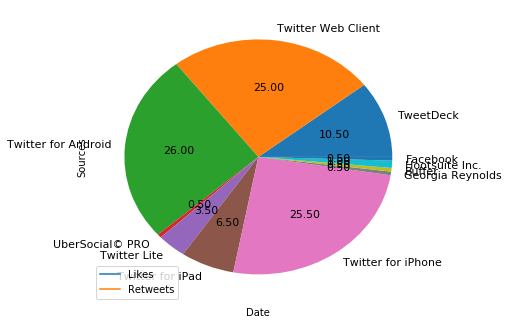

In [3]:

a=[]
b=[]
c=[]
d=[]
e=[]
f=[]
g=[]
#for tweet in tweets:
for tweet in search2:
    
    
    
    a.append(tweet.text )
    b.append(len(tweet.text))
    c.append(tweet.id)
    d.append(tweet.created_at)
    e.append(tweet.source)
    f.append(tweet.favorite_count )
    g.append(tweet.retweet_count)
    

 




data = pd.DataFrame()
data['text']=a
data['len']  = b
data['ID']   = c
data['Date'] = d
data['Source'] = e
data['Likes']  = f
data['RTs'] =g      
    
#data['Replay'] = = np.array([tweet.replay_count for tweet in tweets])
#display(data.head(10))
#listIDs=data['ID']


# We extract the mean of lenghts:
mean = np.mean(data['len'])
print("The lenght's average in tweets: {}".format(mean))


fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
#print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
#print("Number of likes: {}".format(fav_max))
#print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
#print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
#print("Number of retweets: {}".format(rt_max))
#print("{} characters.\n".format(data['len'][rt]))

# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);


# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

    
    # We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
        
percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));




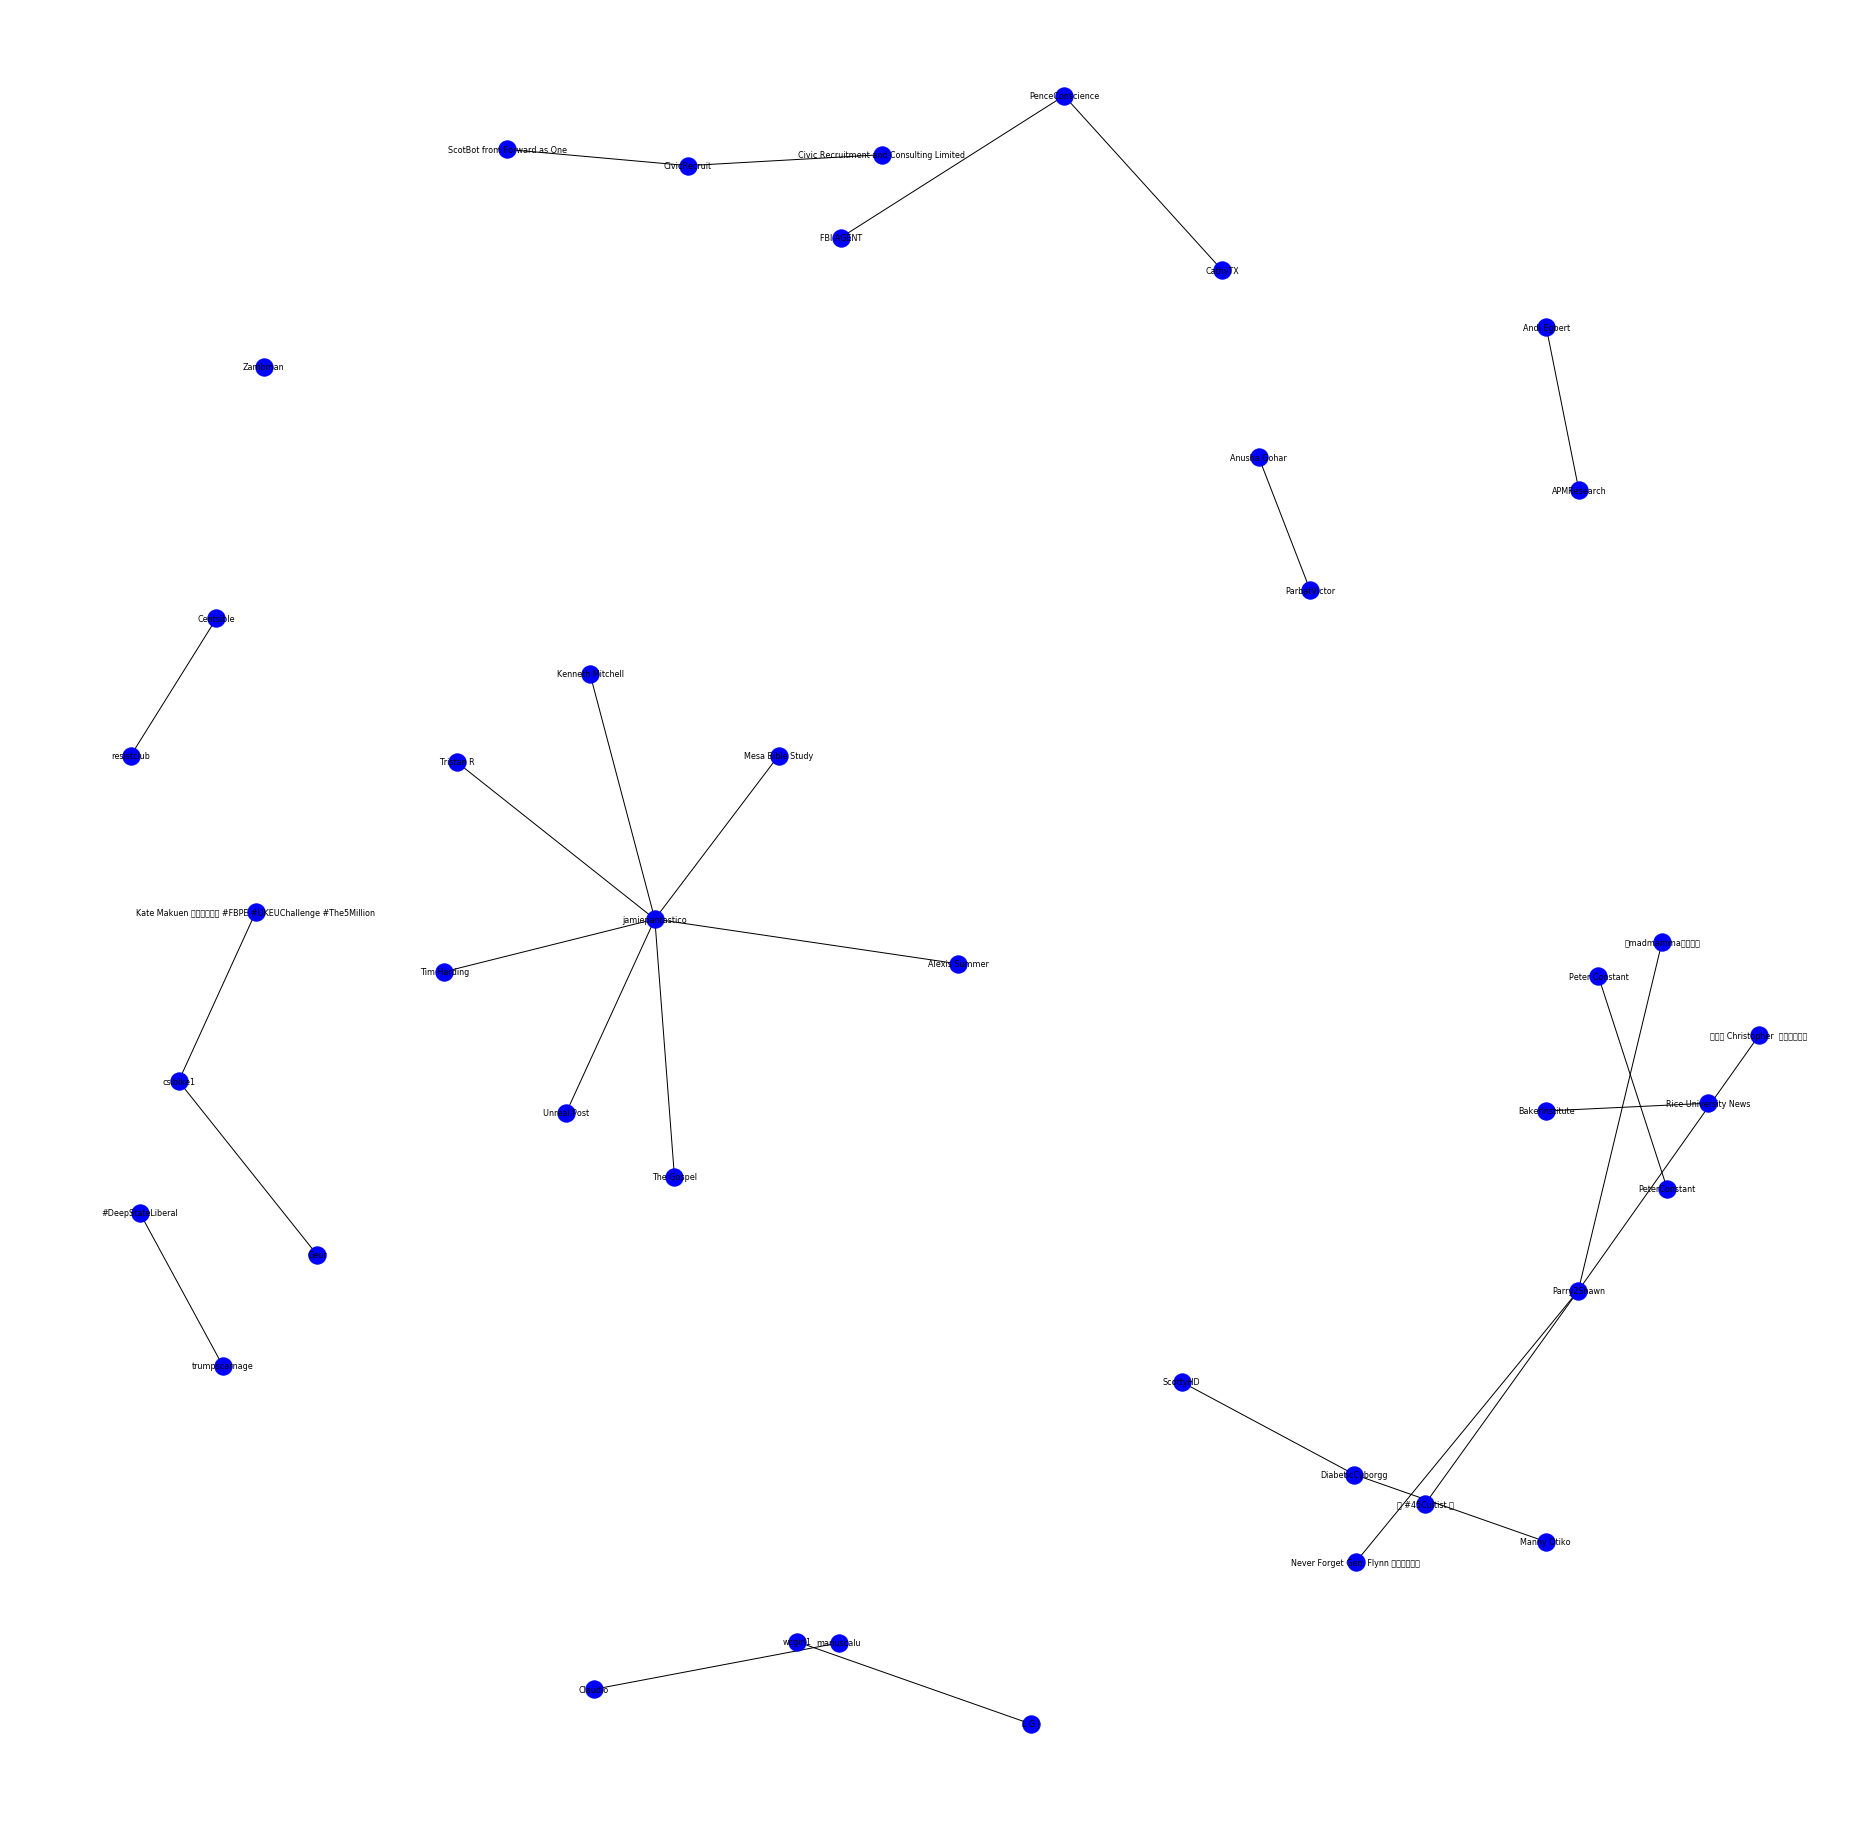

In [19]:
import plotly.plotly as py
from plotly.graph_objs import *

import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('test29.csv')

df.describe()



# attention lambda est une manière de définir une fonction 
# en python en une seule ligne

df.idNomTweeteur=df.idNomTweeteur.apply(lambda x: int(x))
df.idretweeteur=df.idretweeteur.apply(lambda x: int(x))

# essayez les deux commandes
# un graphe
# un digraphe
G = nx.DiGraph()
G = nx.Graph()

G.add_nodes_from(df['NomTweeteur'])

#G.add_edges_from(zip(df['userFromId'],df['userToId']))

temp = zip(df['NomTweeteur'],df['retweetName'])
G.add_edges_from(temp)

plt.figure(4,figsize=(25,25)) 
nx.draw(G,pos=nx.spring_layout(G,k=.50),font_size=8,with_labels=True,node_color = "blue")
plt.show()

pos=nx.spring_layout(G,k=.50)


#centralScore = nx.betweenness_centrality(G)
#inScore = G.in_degree()
#outScore = G.out_degree()


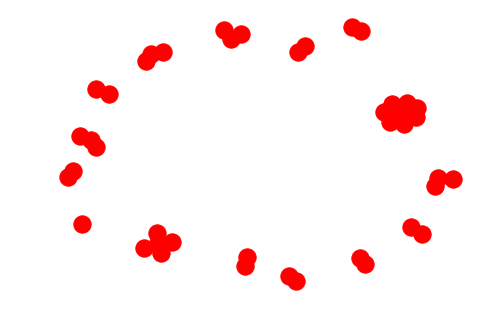

In [20]:
nx.draw(G)
nx.write_gexf(G,"GraphTwitterDemo.gexf")

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
import re

In [21]:
def clean_text(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

In [22]:
df = pd.read_csv('test28.csv')

In [23]:
descriptions = np.array(list(map(clean_text,df.text)))

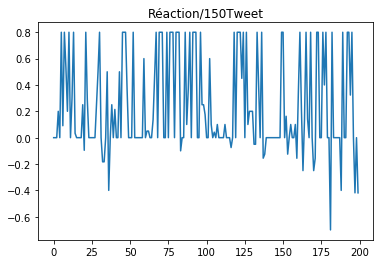

In [24]:
txt=[]
for message in descriptions :
    analysis = TextBlob(message) 
    txt.append(analysis.sentiment.polarity)
plt.plot(np.array(txt))  # arguments are passed to np.histogram

plt.title("Appréciation/200Tweet")
plt.show()

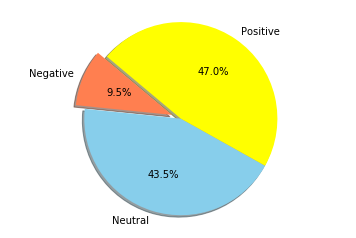

In [25]:
 # Data to plot
sizes = {
    'Negative':0, 'Neutral':0, 'Positive':0
}
for i in txt :
    if i > 0:
        sizes['Positive'] +=1
    elif i < 0:
        sizes['Negative'] +=1
    else:
        sizes['Neutral'] +=1


colors = ['coral','skyblue', 'yellow']
explode = (0.1, 0, 0) 
plt.pie(sizes.values(), labels=sizes.keys(), colors=colors,explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()